/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## import Modules

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## loading the dataset 

In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
## statistical info
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
## datatype info 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Exploratory Data Analysis

<Axes: xlabel='Survived', ylabel='count'>

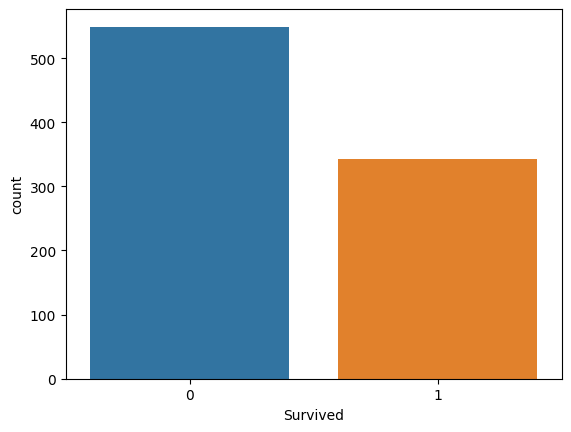

In [6]:
## categorical data
sns.countplot(data = train , x = train['Survived'])

<Axes: xlabel='Sex', ylabel='count'>

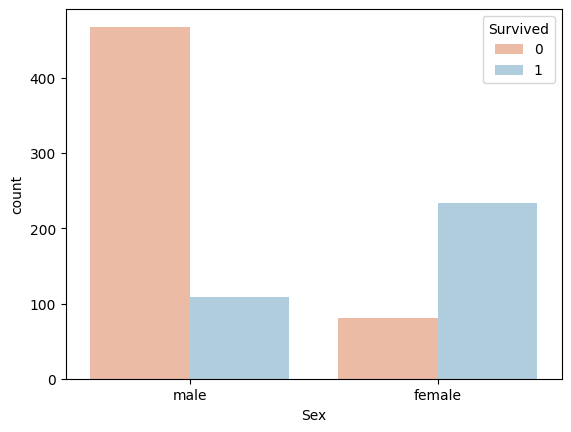

In [7]:
sns.countplot(data = train , x = train['Sex'] , hue= train['Survived'] , palette=('RdBu'))

<Axes: xlabel='Pclass', ylabel='count'>

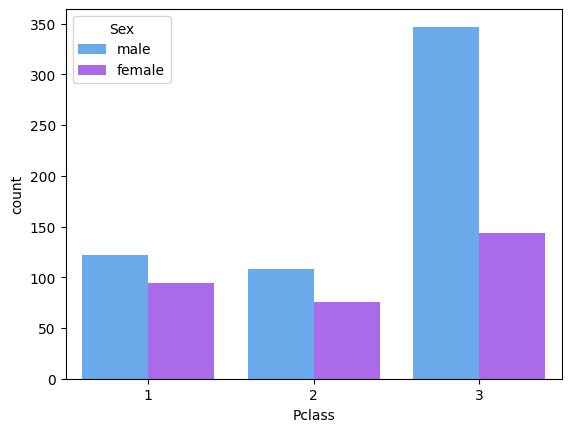

In [8]:
sns.countplot(data = train , x = train['Pclass'] , hue= train['Sex'] , palette=('cool'))

<Axes: xlabel='Pclass', ylabel='count'>

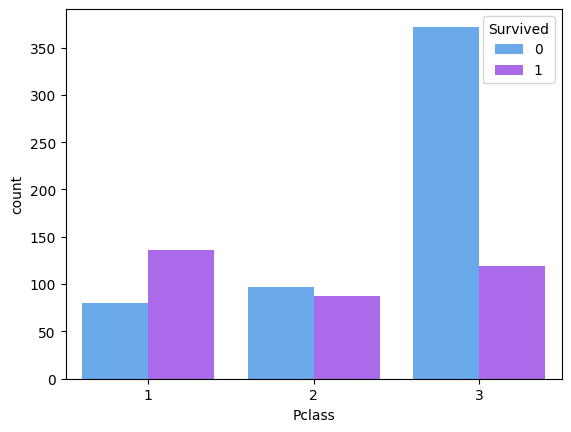

In [9]:
sns.countplot(data = train , x = train['Pclass'] , hue= train['Survived'] , palette=('cool'))

<Axes: xlabel='Pclass', ylabel='count'>

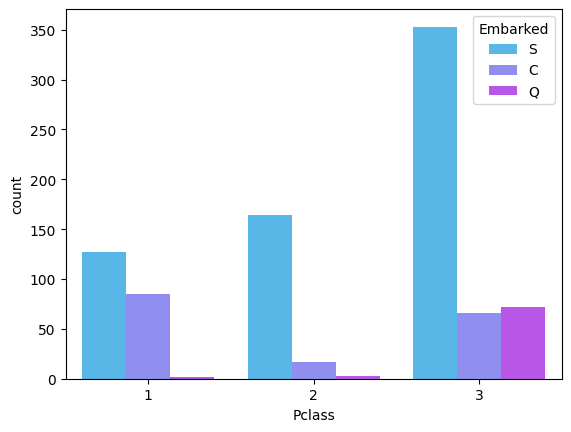

In [10]:
sns.countplot(data = train , x = train['Pclass'] , hue= train['Embarked'] , palette=('cool'))

<Axes: xlabel='Survived', ylabel='count'>

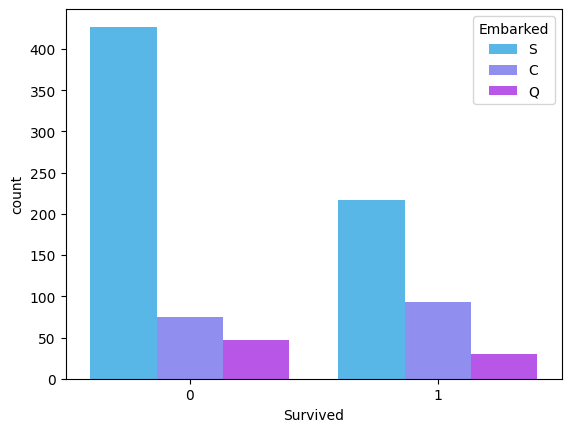

In [11]:
sns.countplot(data = train , x = train['Survived'] , hue= train['Embarked'] , palette=('cool'))

<Axes: xlabel='Embarked', ylabel='count'>

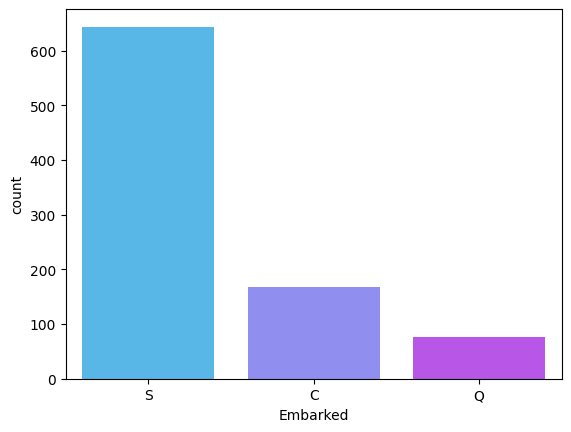

In [12]:
sns.countplot(data = train , x = train['Embarked'], palette=('cool'))

### 
* Embarked contains the boarding port/cities of passengers.
* There are three cities with S having the more number of values.


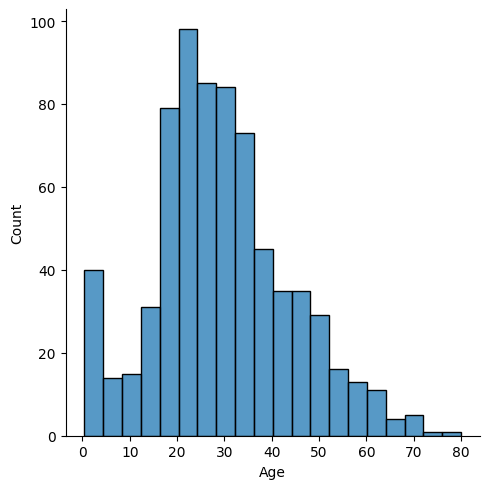

In [13]:
## numrical data
sns.displot(train['Age'])

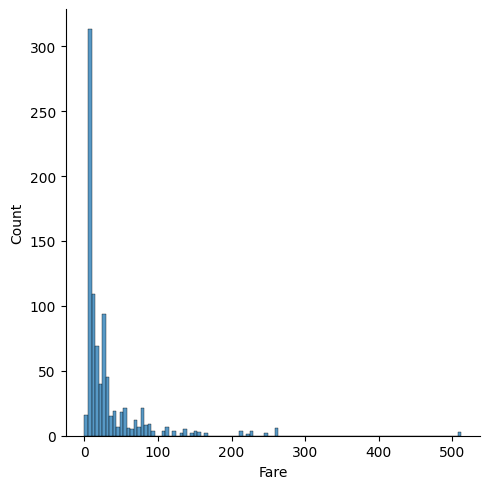

In [14]:
sns.displot(train['Fare'])

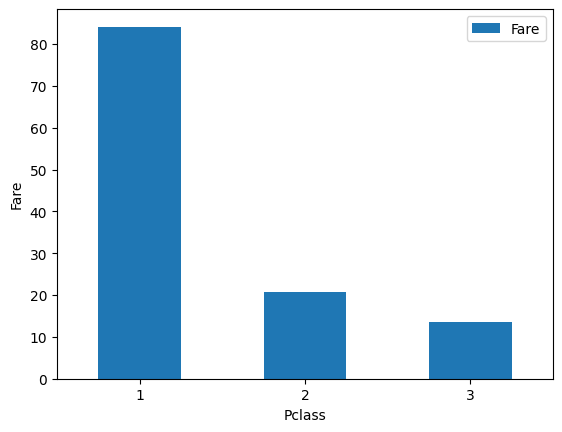

In [15]:
class_fare = train.pivot_table(index = 'Pclass' , values='Fare')
class_fare.plot(kind = 'bar')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.xticks(rotation = 0)
plt.show()

<Axes: >

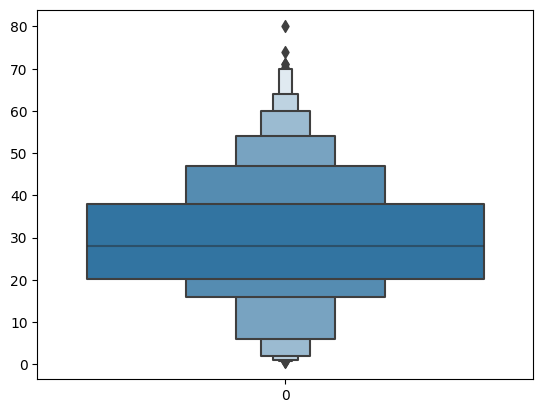

In [16]:
sns.boxenplot(train['Age'])

<Axes: xlabel='Pclass', ylabel='Age'>

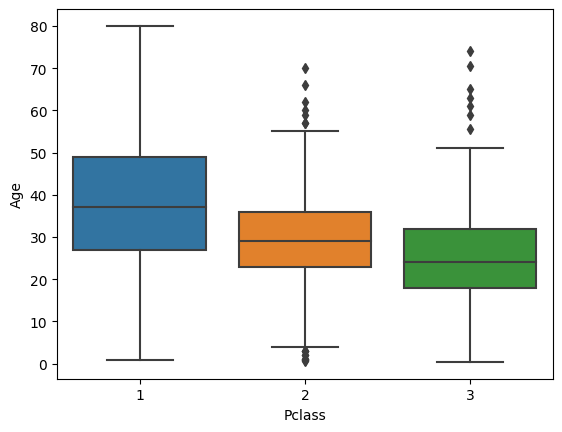

In [17]:
sns.boxplot(x='Pclass' ,  y='Age' , data = train)

## Data Preprocessing

In [18]:
train_len = len(train)
df = pd.concat([train,test],axis = 0)
df = df.reset_index()
df

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [19]:
df.isnull().sum()

index             0
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [20]:
df['Age'].mean()

29.881137667304014

In [21]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [22]:
df['Embarked'].mode()[0]

'S'

In [23]:
# fill missing values using mode of the categorical column
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [24]:
df=df.drop(columns=['Cabin'], axis = 1)

In [25]:
df.isnull().sum()

index            0
PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

## Log transformation for Normal data distribution

### we have to normalize the column 'Fare'

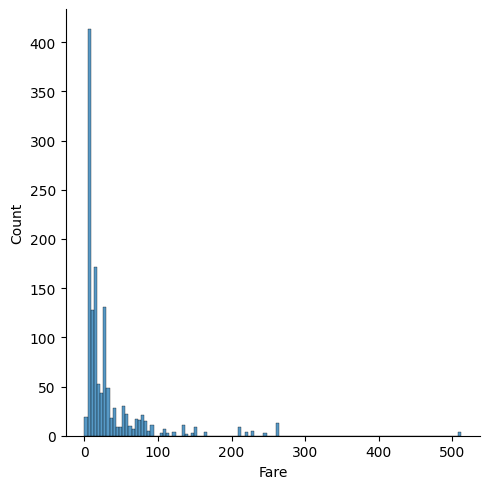

In [26]:
sns.displot(df['Fare'])

In [27]:
df['Fare'] = np.log(df['Fare']+1)

* if the'fare' has a '0' value then it will result in an error.
* To resolve this issue we have to add +1 in log transformation.

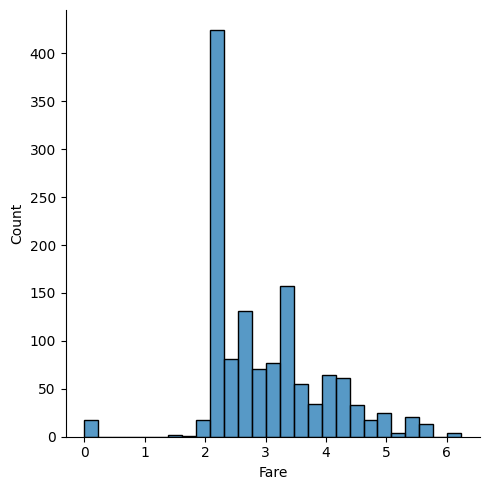

In [28]:
sns.displot(df['Fare'])

In [29]:
df.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S


Now, we will remove a few unnecessary columns. 

In [30]:
df = df.drop(columns = ['Name','Ticket'],axis = 1)


In [31]:
df.head()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,0.0,3,male,22.0,1,0,2.110213,S
1,1,2,1.0,1,female,38.0,1,0,4.280593,C
2,2,3,1.0,3,female,26.0,0,0,2.188856,S
3,3,4,1.0,1,female,35.0,1,0,3.990834,S
4,4,5,0.0,3,male,35.0,0,0,2.202765,S


### Label Encoding

#### Label Encoding refers to converting the labels into the numeric form and converting them into the machine-readable form. We will convert the column 'Sex' and 'Embarked'.



In [32]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()


,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,0.0,3,1,22.0,1,0,2.110213,2
1,1,2,1.0,1,0,38.0,1,0,4.280593,0
2,2,3,1.0,3,0,26.0,0,0,2.188856,2
3,3,4,1.0,1,0,35.0,1,0,3.990834,2
4,4,5,0.0,3,1,35.0,0,0,2.202765,2


In [33]:
train =df.iloc[:train_len,:]
test = df.iloc[train_len:,:]

In [34]:
train.head()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,0.0,3,1,22.0,1,0,2.110213,2
1,1,2,1.0,1,0,38.0,1,0,4.280593,0
2,2,3,1.0,3,0,26.0,0,0,2.188856,2
3,3,4,1.0,1,0,35.0,1,0,3.990834,2
4,4,5,0.0,3,1,35.0,0,0,2.202765,2


In [35]:
test.head()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,0,892,NaN,3,1,34.5,0,0,2.178064,1
892,1,893,NaN,3,0,47.0,1,0,2.079442,2
893,2,894,NaN,2,1,62.0,0,0,2.369075,1
894,3,895,NaN,3,1,27.0,0,0,2.268252,2
895,4,896,NaN,3,0,22.0,1,1,2.586824,2


In [36]:
# input split
X = train.drop(columns=['PassengerId', 'Survived'], axis=1)
y = train['Survived']

In [37]:
from sklearn.model_selection import train_test_split, cross_val_score
# classify column
def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test, y_test))
    
    score = cross_val_score(model, X, y, cv=5)
    print('CV Score:', np.mean(score))

In [47]:
##  Logistic Regression

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model)

Accuracy: 0.7892376681614349
CV Score: 0.7890088506685078


In [46]:
## Decision Tree:

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

Accuracy: 0.7533632286995515
CV Score: 0.7577804280961647


In [45]:
## Random Forest:

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model)

Accuracy: 0.8251121076233184
CV Score: 0.8115623626890967


In [41]:
## Extra Trees:

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model)

Accuracy: 0.8295964125560538
CV Score: 0.8070617035967611


In [42]:
## XGBoost:

from xgboost import XGBClassifier
model = XGBClassifier()
classify(model)

Accuracy: 0.8026905829596412
CV Score: 0.7801707363002951


In [44]:
## CatBoost:

from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose=0)
classify(model)

Accuracy: 0.820627802690583
CV Score: 0.798079216621681


## Complete Model Training with Full Train Data

Before submitting our model, we have to train it with the full data.

In [49]:
model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

In [50]:
test.head()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,0,892,NaN,3,1,34.5,0,0,2.178064,1
892,1,893,NaN,3,0,47.0,1,0,2.079442,2
893,2,894,NaN,2,1,62.0,0,0,2.369075,1
894,3,895,NaN,3,1,27.0,0,0,2.268252,2
895,4,896,NaN,3,0,22.0,1,1,2.586824,2


In [51]:
# input split for test data
X_test = test.drop(columns=['PassengerId', 'Survived'], axis=1)

In [52]:
X_test.head()

,index,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,0,3,1,34.5,0,0,2.178064,1
892,1,3,0,47.0,1,0,2.079442,2
893,2,2,1,62.0,0,0,2.369075,1
894,3,3,1,27.0,0,0,2.268252,2
895,4,3,0,22.0,1,1,2.586824,2


In [53]:
pred = model.predict(X_test)
pred

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [54]:
sub = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [55]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [56]:
sub['Survived'] = pred
sub['Survived'] = sub['Survived'].astype('int')

In [57]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [58]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [60]:
sub.to_csv('submission.csv', index=False)